In [1]:
import gym
import numpy as np
from td3_tf2 import Agent
from utils import plot_learning_curve

... saving models ...
episode  0 score -1801.6 average score -1801.6
... saving models ...
episode  1 score -1571.9 average score -1686.8
... saving models ...
episode  2 score -1161.3 average score -1511.6
episode  3 score -1673.3 average score -1552.0
episode  4 score -1569.3 average score -1555.5
episode  5 score -1836.6 average score -1602.3
episode  6 score -1337.5 average score -1564.5
... saving models ...
episode  7 score -1137.3 average score -1511.1
... saving models ...
episode  8 score -1277.3 average score -1485.1
... saving models ...
episode  9 score -1315.3 average score -1468.1


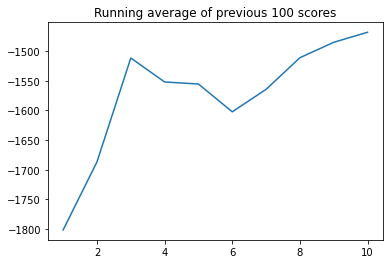

In [2]:
if __name__ == '__main__':
    #env = gym.make('LunarLanderContinuous-v2')
    env = gym.make('Pendulum-v0')
    #env = gym.make('BipedalWalker-v2')
    agent = Agent(alpha=0.001, beta=0.001,
            input_dims=env.observation_space.shape, tau=0.005,
            env=env, batch_size=100, layer1_size=400, layer2_size=300,
            n_actions=env.action_space.shape[0])
    n_games = 10
    filename = 'plots/' + 'walker_' + str(n_games) + '_games.png'

    best_score = env.reward_range[0]
    score_history = []

    #If you want to load the models
    #agent.load_models()

    #Play the games
    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation)
            next_observation, reward, done, info = env.step(action)
            agent.remember(observation, action, reward, next_observation, done)
            agent.learn()
            score += reward
            observation = next_observation
        score_history.append(score)
        avg_score = np.mean(score_history[-100:]) #takes the mean of the last 100 scores

        #Save the model when it is better than the best model so far
        if avg_score > best_score:
            best_score = avg_score
            agent.save_models()

        print('episode ', i, 'score %.1f' % score,
                'average score %.1f' % avg_score)

    x = [i+1 for i in range(n_games)]
    plot_learning_curve(x, score_history, filename)